In [1]:
import networkx as nx
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import matplotlib.colors as mcolors

In [2]:
def read_file(filename):
    graphs = []
    with open(filename) as f:
        lines = f.readlines()
        for i in range(1, len(lines),1):
            traj = lines[i][3:]
            traj = traj.strip().split(";")
            g = nx.empty_graph(0, nx.DiGraph())
            for n in range(len(traj)-2):
                coords = traj[n].split(",")
                x = coords[0]
                y = coords[1]
                a = (x,y)
                coords_next = traj[n+1].split(",")
                x_next = coords_next[0]
                y_next = coords_next[1]
                b = (x_next, y_next)
                g.add_edge(a,b)
            graphs.append(g)
    return graphs

In [3]:
def draw_with_coords(graphs):
    G = graphs[0]
    nx.set_edge_attributes(G, 'red', 'color')
    for i in range(1, len(graphs)):
        random_color = random.choice(list(mcolors.CSS4_COLORS.keys()))
        curr = graphs[i]
        nx.set_edge_attributes(curr, random_color, 'color')
        G = nx.compose(G, curr)
    
    positions = {}
    for node in list(G.nodes()):
            if node not in positions.keys():
                x = node[0]
                y = node[1]
                coords = [float(x), float(y)]
                positions[node] = coords

    fig, ax = plt.subplots()
    pos = positions
    edge_colors = nx.get_edge_attributes(G, 'color')
    nx.draw(G, pos = pos, ax = ax, connectionstyle='arc3, rad = 0.1', node_size=20, edge_color=list(edge_colors.values()), with_labels=False)
    #nx.draw_networkx_labels(G, pos=pos)
    plt.axis("on")
    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
    plt.show()

In [4]:
def big_func(filename_orig, filename_noisy):
    orig = read_file(filename_orig)
    noisy = read_file(filename_noisy)

    draw_with_coords(orig)
    draw_with_coords(noisy)

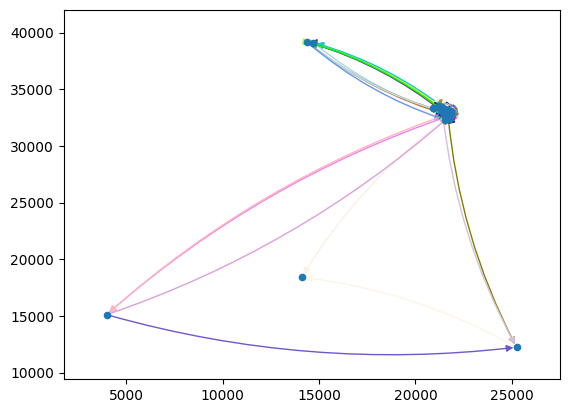

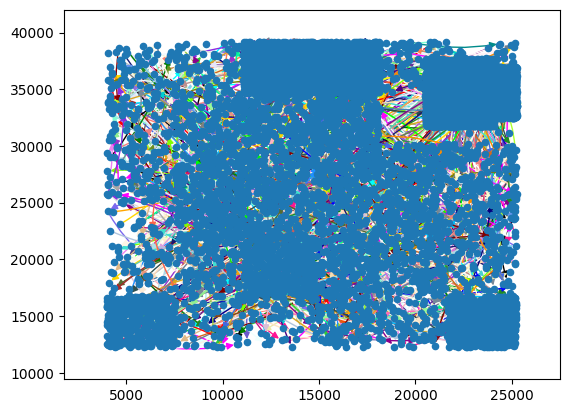

In [24]:
big_func("/local/03-03-1-adatrace-orig.dat", "/local/03-03-1-adatrace-eps1.0-iteration0.dat")

In [5]:
def draw_no_coords(filename):
    noisy = read_file(filename)

    G = noisy[0]
    nx.set_edge_attributes(G, 'red', 'color')
    for i in range(1, len(noisy)):
        random_color = random.choice(list(mcolors.CSS4_COLORS.keys()))
        curr = noisy[i]
        nx.set_edge_attributes(curr, random_color, 'color')
        G = nx.compose(G, curr)
    plt.figure(figsize=(10, 8))
    edge_colors = nx.get_edge_attributes(G, 'color')
    nx.draw_planar(G, connectionstyle='arc3, rad = 0.1', edge_color=list(edge_colors.values()), with_labels=False)

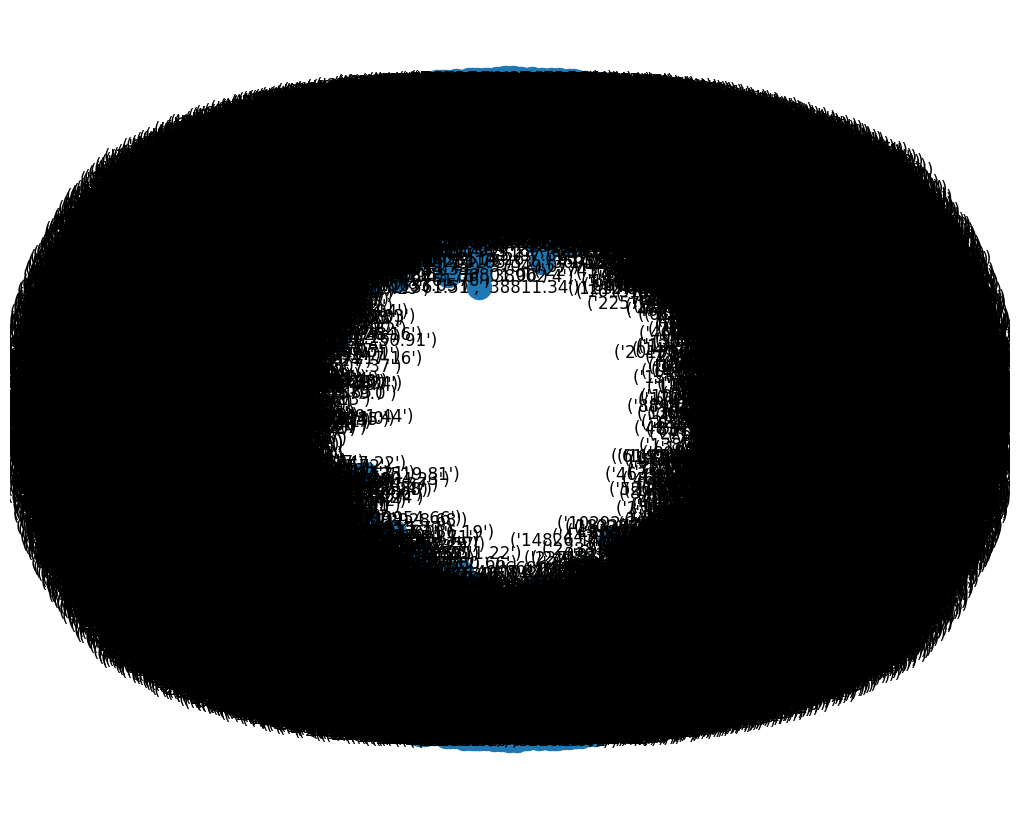

In [6]:
draw_no_coords("/local/03-03-1-adatrace-eps1.0-iteration0.dat")

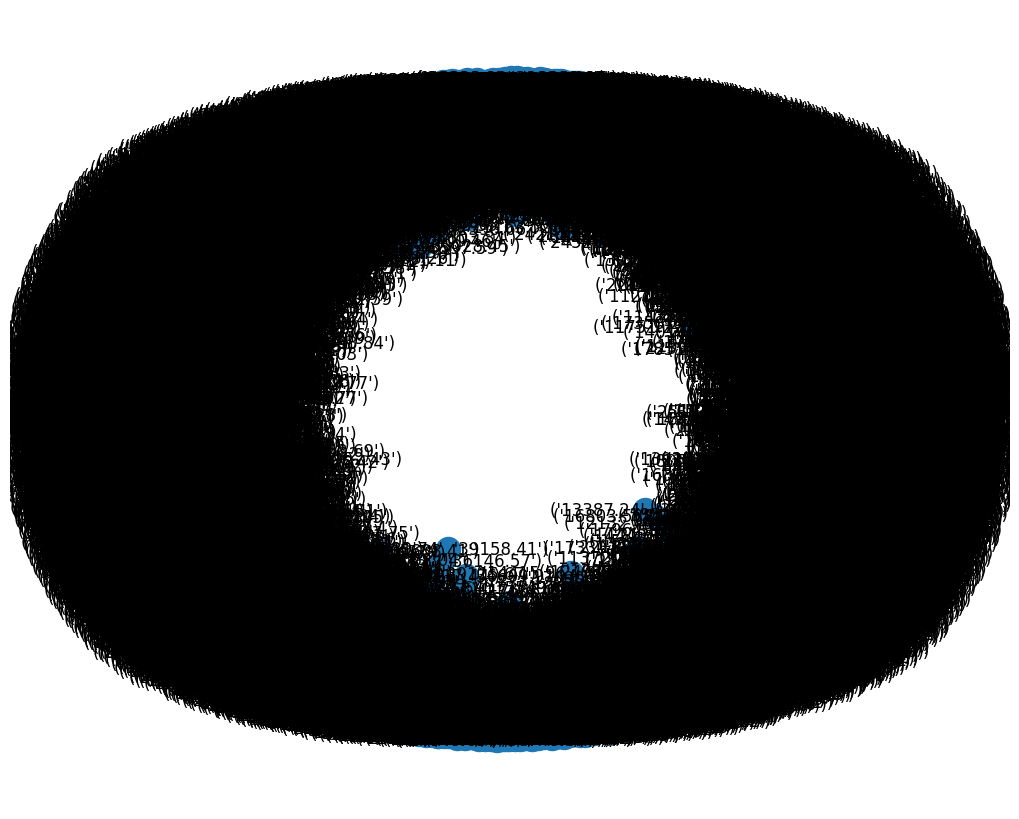

In [7]:
draw_no_coords("/local/03-03-1-adatrace-eps20.0-iteration0.dat")

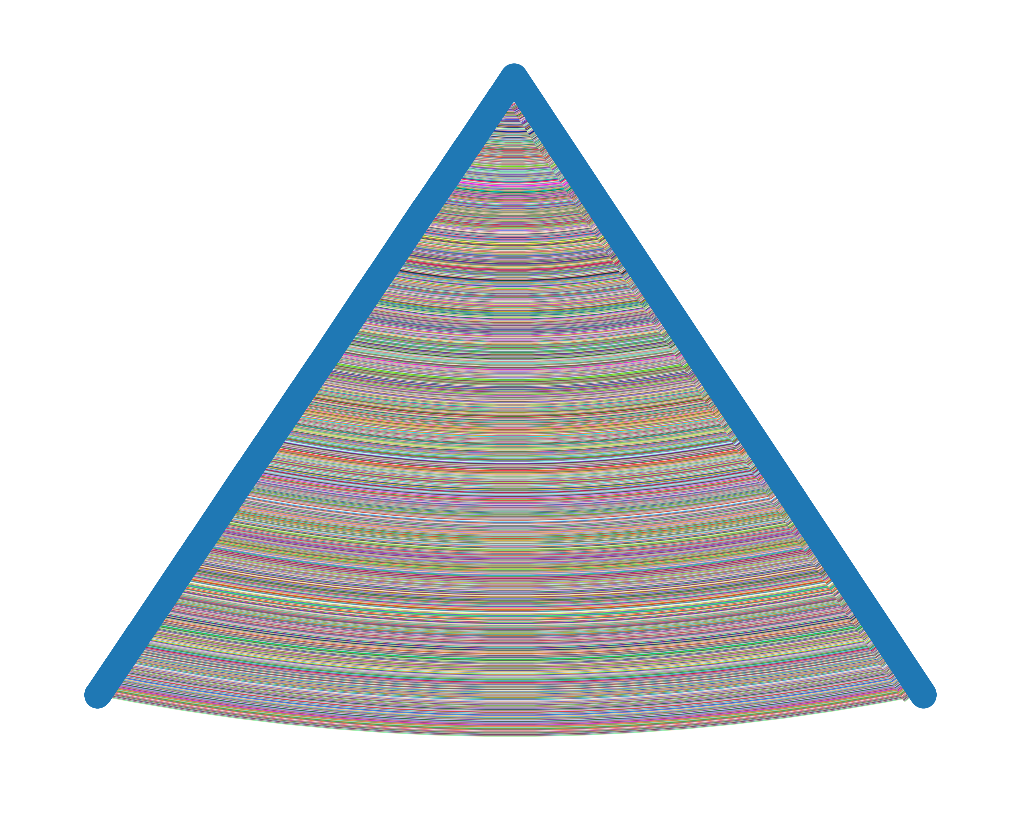

In [10]:
draw_no_coords("/local/03-03-1-adatrace-eps20.0-rounded.dat")

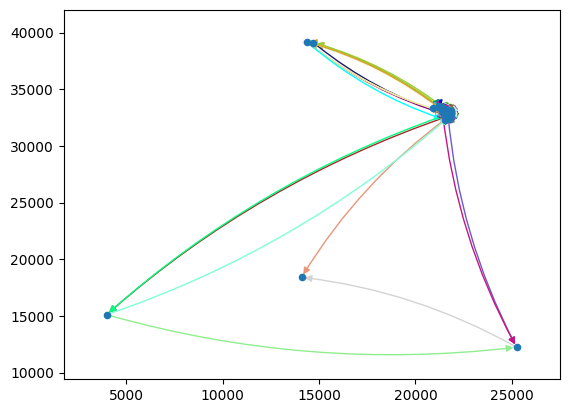

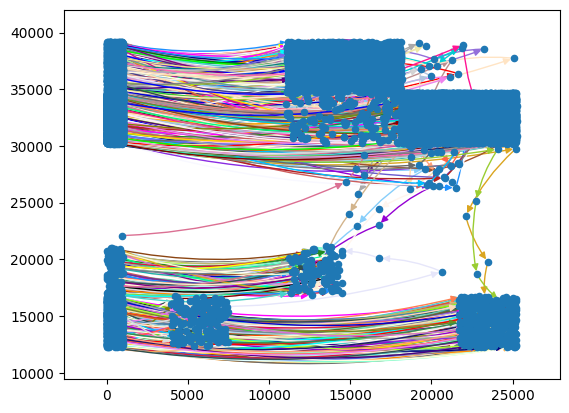

In [23]:
big_func("/local/03-03-1-adatrace-orig.dat", "/local/03-03-1-adatrace-eps20.0-rounded.dat")

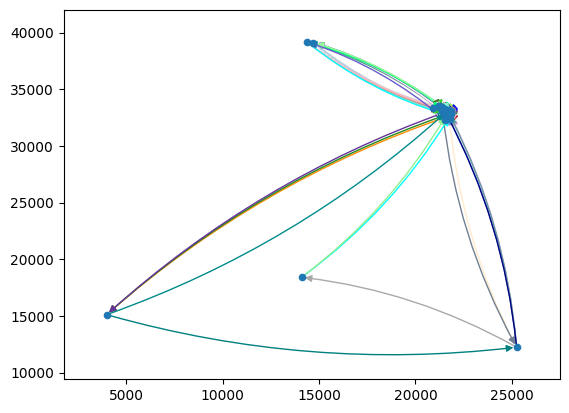

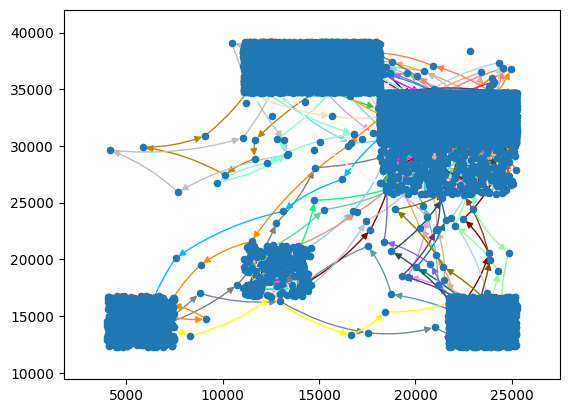

In [6]:
big_func("/local/03-03-2-adatrace-orig.dat", "/local/03-03-2-adatrace-eps50.0-iteration0.dat")